### Part 1: Supervised Learning Model to predict life Expectancy.

#### Perfome Exploratory Data Analysis

In [1]:
#First, import all necessary libraries needed.
import csv
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
#Load the dataset using pandas

life_dfr = pd.read_csv("life_expectancy_data.csv")

In [3]:
#Check for missing values in the dataframe.
life_dfr.isna().sum()

Country                  0
Year                     0
Status                   0
Life expectancy          0
Adult Mortality          0
infant deaths            0
GDP                      0
Life expectancy class    0
dtype: int64

Comment: The above shows that there are no missing values for all columns.

In [4]:
#Load dataframe to examine it
life_dfr

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,GDP,Life expectancy class
0,Afghanistan,2015,Developing,65.0,263.0,62,584.259210,Low
1,Albania,2015,Developing,77.8,74.0,0,3954.227830,High
2,Algeria,2015,Developing,75.6,19.0,21,4132.762920,Medium
3,Angola,2015,Developing,52.4,335.0,66,3695.793748,Low
4,Antigua and Barbuda,2015,Developing,76.4,13.0,0,13566.954100,High
...,...,...,...,...,...,...,...,...
178,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,4110.000000,Medium
179,Viet Nam,2015,Developing,76.0,127.0,28,2600.000000,High
180,Yemen,2015,Developing,65.7,224.0,37,1490.000000,Low
181,Zambia,2015,Developing,61.8,33.0,27,1313.889646,Low


In [5]:
# print some information about the dataset
life_dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                183 non-null    object 
 1   Year                   183 non-null    int64  
 2   Status                 183 non-null    object 
 3   Life expectancy        183 non-null    float64
 4   Adult Mortality        183 non-null    float64
 5   infant deaths          183 non-null    int64  
 6   GDP                    183 non-null    float64
 7   Life expectancy class  183 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 11.6+ KB


<Axes: xlabel='Life expectancy', ylabel='Count'>

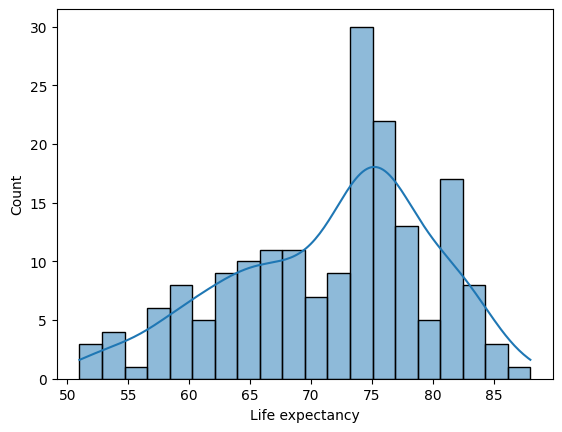

In [6]:
#To check the distribution of Life_expectancy.
sns.histplot(life_dfr["Life expectancy"], bins = 20, kde = True)

Comment: The mean of the Life expectancy is about 75 years.

Using Scatterplot, check how life_expectancy depends on the
the other continuous features column of the data frames

<Axes: xlabel='GDP', ylabel='Life expectancy'>

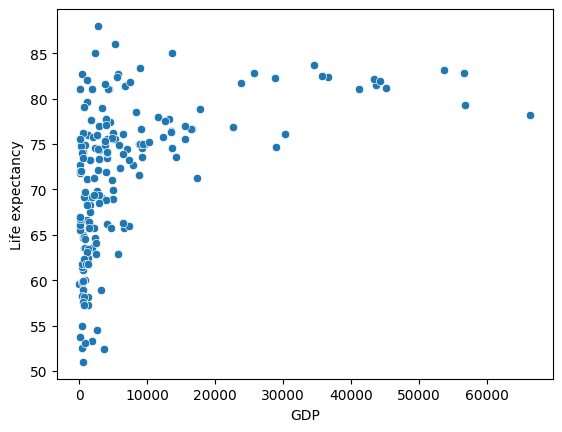

In [7]:
#Scatterplot to find correlation between GDP and life Expectancy.
sns.scatterplot(data = life_dfr, x = "GDP", y = "Life expectancy")

Comment: The correlation is not linear. Plot shows that an increase in GDP leads to an increase in life expectancy, and there is a point it is maintained.

<Axes: xlabel='Adult Mortality', ylabel='Life expectancy'>

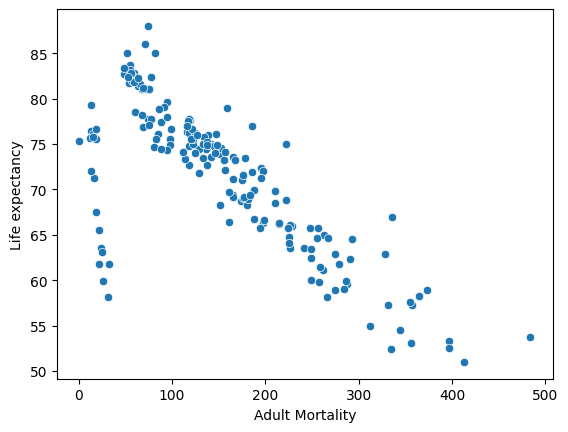

In [8]:
#Scatterplot to find correlation between Adult Mortality and life Expectancy.
sns.scatterplot(data = life_dfr, x = "Adult Mortality", y = "Life expectancy")

Comment: The plot shows a negative slope correlation between Life expectancy and Adult Mortality. Where as the Adulti Mortality increases, the life expectancy decreases.

<Axes: xlabel='infant deaths', ylabel='Life expectancy'>

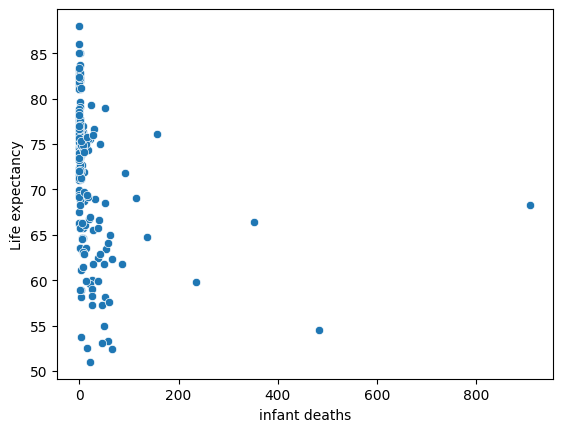

In [9]:
#Scatterplot to find correlation between infant deaths and life Expectancy.
sns.scatterplot(data = life_dfr, x = "infant deaths", y = "Life expectancy")

Comment: The plot does not give an expository report on the Life expectancy. The plot shows that as the infant death increases, life expectancy remains the same

Using Seaborns Heat map, we can determine which variables correlates more with life expectancy of the above 3 scatter plot.

<Axes: >

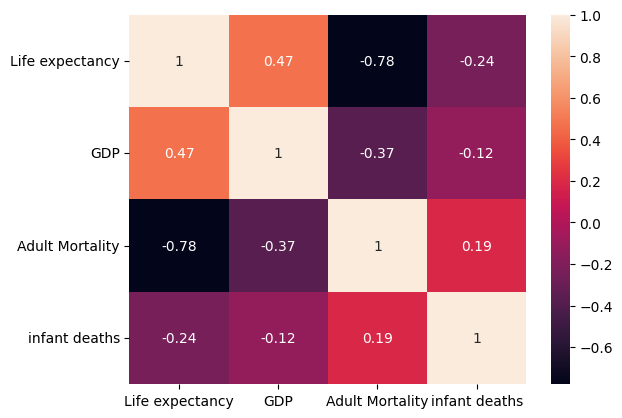

In [10]:
#since we are checking correlation of the 4 features at the same time using heat map.
#we need to put all column feature in a list.
# employ the .corr() function to calculate the correlation matrix
column_list = ["Life expectancy", "GDP", "Adult Mortality","infant deaths"]
sns.heatmap (life_dfr[column_list].corr(), annot = True)

Comment: From the above positive value show a directly proportional correlation, while a negative valule shows an inversely proportional correlation.

The most significant number represents a more correlations betwwen feature columns. From the heatmap, Life expectancy and Adult mortality has a higher negative value, which means they have inverse proportionality.

#### a: Simple Linear Regression Models.

Simple Linear Regression for life expectancy and GDP

In [11]:
# x = independent variable takes GDP
# y = dependent variable takes Life expectancy

x = life_dfr["GDP"]
y = life_dfr["Life expectancy"]

In [12]:
#print x  and y
x ,y 

(0        584.259210
 1       3954.227830
 2       4132.762920
 3       3695.793748
 4      13566.954100
            ...     
 178     4110.000000
 179     2600.000000
 180     1490.000000
 181     1313.889646
 182      118.693830
 Name: GDP, Length: 183, dtype: float64,
 0      65.0
 1      77.8
 2      75.6
 3      52.4
 4      76.4
        ... 
 178    74.1
 179    76.0
 180    65.7
 181    61.8
 182    67.0
 Name: Life expectancy, Length: 183, dtype: float64)

In [13]:
# we need to reshape independent variable x since it is a single data to an array.
#using numpy and rebinding it to x again.

x = x.to_numpy().reshape(-1,1)

In [14]:
x

array([[5.84259210e+02],
       [3.95422783e+03],
       [4.13276292e+03],
       [3.69579375e+03],
       [1.35669541e+04],
       [1.34671236e+04],
       [3.69654776e+02],
       [5.65543876e+04],
       [4.36659470e+04],
       [5.53138200e+01],
       [3.02100000e+04],
       [2.26888782e+04],
       [1.21158120e+02],
       [1.55578381e+04],
       [5.94911677e+03],
       [4.35687500e+03],
       [4.84999750e+03],
       [7.83947910e+02],
       [2.61364518e+03],
       [2.98000000e+03],
       [4.57497870e+03],
       [6.53265100e+03],
       [8.75726220e+03],
       [3.96789510e+03],
       [6.99347736e+03],
       [6.15592225e+02],
       [3.36812230e+01],
       [1.94000000e+03],
       [2.95411947e+03],
       [1.16318977e+03],
       [1.24442942e+03],
       [4.33157440e+04],
       [3.48381417e+02],
       [7.77248751e+02],
       [1.36532264e+04],
       [8.69211938e+02],
       [6.44525556e+02],
       [7.27646387e+02],
       [2.35000000e+03],
       [1.14636273e+03],


#### Splitting the dataset into training and testing sets

In [15]:
# split data (reshaped column) into a train and test set using the 
# "sklearn" lib
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y,
            test_size = 0.2,random_state = 42) #this is 80% trained data and 20% test data


In [16]:
#using the above transform the the train and test data accordingly

x_train

array([[9.21219282e+03],
       [5.54487660e+02],
       [4.33157440e+04],
       [1.21158120e+02],
       [7.62261218e+02],
       [1.92268100e+03],
       [1.36665834e+04],
       [9.32929835e+03],
       [9.25211724e+03],
       [2.84728557e+03],
       [2.35000000e+03],
       [1.66273643e+04],
       [1.19982230e+03],
       [4.99000000e+03],
       [8.58000000e+02],
       [4.13276292e+03],
       [8.95878859e+03],
       [5.31464416e+03],
       [3.91174689e+03],
       [8.81898257e+03],
       [1.34997144e+03],
       [3.82891589e+03],
       [3.36812230e+01],
       [1.16176935e+03],
       [1.55248425e+04],
       [3.82189370e+03],
       [6.66414400e+03],
       [6.44525556e+02],
       [1.25659876e+04],
       [8.75726220e+03],
       [6.46119255e+03],
       [1.31344367e+04],
       [4.42928847e+04],
       [2.26888782e+04],
       [4.11000000e+03],
       [5.36297375e+04],
       [3.69654776e+02],
       [1.94000000e+03],
       [4.52387170e+02],
       [1.35669541e+04],


In [17]:
x_test

array([[2.98000000e+03],
       [2.37511270e+03],
       [3.13692511e+03],
       [1.19459137e+03],
       [1.92241388e+03],
       [4.35687500e+03],
       [6.99347736e+03],
       [5.96871719e+02],
       [3.58997310e+02],
       [3.62657544e+02],
       [4.18575951e+01],
       [4.86000000e+03],
       [4.13668992e+03],
       [9.29000000e+02],
       [4.82000000e+02],
       [4.84999750e+03],
       [4.12711775e+03],
       [8.69211938e+02],
       [3.44741374e+04],
       [4.92189629e+03],
       [5.51138346e+02],
       [4.19367724e+02],
       [1.63900000e+04],
       [1.24442942e+03],
       [5.53138200e+01],
       [6.33432590e+01],
       [6.12000000e+02],
       [2.61364518e+03],
       [7.58725782e+02],
       [7.43765349e+02],
       [3.33616686e+03],
       [6.45463763e+02],
       [7.45524654e+03],
       [2.72986383e+03],
       [3.92357334e+03],
       [1.16318977e+03],
       [5.67600000e+04]])

In [18]:
y_train

65     73.6
67     59.0
31     82.2
12     71.8
41     79.1
       ... 
106    69.4
14     72.3
92     53.7
179    76.0
102    81.7
Name: Life expectancy, Length: 146, dtype: float64

In [19]:
y_test

19     77.0
42     85.0
155    58.9
111    66.6
147    69.2
15     81.1
24     74.5
68     58.9
117    61.8
98     58.3
97     65.5
161    75.7
69     66.2
173    61.8
45     59.8
16     71.0
51     73.5
35     76.1
82     83.7
56     69.9
163    59.9
124    74.0
145    76.7
30     57.3
9      72.7
125    75.5
60     61.1
18     69.8
150    57.3
113    69.2
75     69.1
55     64.8
119    81.8
146    88.0
66     71.9
29     68.7
174    79.3
Name: Life expectancy, dtype: float64

#### Apply standardization

In [20]:
#Standardize the data set to get a zero mean and standard deviation of 1.
# This ensures the data are very close to the mean.

from sklearn.preprocessing import StandardScaler

#create an instance of standardscaler
scale = StandardScaler()

#fit the standardization to the whole data set x
scale.fit(x)

StandardScaler()

In [21]:
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

In [22]:
x_train_scaled

array([[ 0.14244528],
       [-0.57651031],
       [ 2.97448199],
       [-0.61249498],
       [-0.55925632],
       [-0.46289241],
       [ 0.51234804],
       [ 0.15216999],
       [ 0.1457607 ],
       [-0.38611114],
       [-0.42740687],
       [ 0.75821804],
       [-0.52292025],
       [-0.20817524],
       [-0.55130595],
       [-0.27936217],
       [ 0.12140202],
       [-0.18121605],
       [-0.29771584],
       [ 0.10979221],
       [-0.51045152],
       [-0.30459432],
       [-0.61975926],
       [-0.52608025],
       [ 0.66666211],
       [-0.30517745],
       [-0.0691505 ],
       [-0.56903335],
       [ 0.42095205],
       [ 0.10466681],
       [-0.08600406],
       [ 0.46815736],
       [ 3.05562598],
       [ 1.26157999],
       [-0.28125245],
       [ 3.83097954],
       [-0.59185925],
       [-0.4614542 ],
       [-0.58498896],
       [ 0.5040746 ],
       [-0.59362584],
       [ 0.07464893],
       [-0.58709839],
       [-0.56195817],
       [ 0.23194885],
       [ 1

In [23]:
x_test_scaled

array([[-3.75090228e-01],
       [-4.25321450e-01],
       [-3.62058809e-01],
       [-5.23354635e-01],
       [-4.62914593e-01],
       [-2.60751387e-01],
       [-4.18019109e-02],
       [-5.72990638e-01],
       [-5.92744272e-01],
       [-5.92440318e-01],
       [-6.19080277e-01],
       [-2.18970739e-01],
       [-2.79036058e-01],
       [-5.45409948e-01],
       [-5.82529848e-01],
       [-2.19801370e-01],
       [-2.79830953e-01],
       [-5.50374885e-01],
       [ 2.24025480e+00],
       [-2.13830730e-01],
       [-5.76788442e-01],
       [-5.87730975e-01],
       [ 7.38506769e-01],
       [-5.19215969e-01],
       [-6.17962842e-01],
       [-6.17296059e-01],
       [-5.71734351e-01],
       [-4.05513169e-01],
       [-5.59549907e-01],
       [-5.60792256e-01],
       [-3.45513320e-01],
       [-5.68955444e-01],
       [-3.45554459e-03],
       [-3.95862107e-01],
       [-2.96733745e-01],
       [-5.25962295e-01],
       [ 4.09092368e+00]])

#### Create the simple linear regression.

In [24]:
#import LinearRegression class from the linear_model

from sklearn.linear_model import LinearRegression

In [25]:
#create an instance of the model and fit the training data
life_linear = LinearRegression()
life_linear.fit(x_train_scaled, y_train)

LinearRegression()

In [26]:
#after fitting put the gradient and intercept

gradient = life_linear.coef_[0]
intercept = life_linear.intercept_

print(f"gradient: {gradient:.2f}")
print(f"intercept: {intercept:.2f}")
print (f"y = {gradient:.2f}x + {intercept:.2f}")

gradient: 3.74
intercept: 71.82
y = 3.74x + 71.82


#### Model Evaluation: This is to test if the model has learnt well.

Introducing perfomance metrics for regression

In [27]:
# we have trained the model using the train data, 
# now we evaluate it using the test dataset

# using the predict() function to the LinearRegression model
life_pred = life_linear.predict(x_test_scaled)

In [28]:
#import the metrics from sklearn metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
#compute the metrics by suppplying y_test and life_pred
mae = mean_absolute_error(y_test, life_pred)
mse = mean_squared_error(y_test, life_pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_test,life_pred)

In [30]:
print(f"The result of the mean_absolute_error is: {mae:.2f}")
print(f"The result of the mean_squared_error is: {mse:.2f}")
print(f"The result of the root mean sqaured error is: {rmse:.2f}")
print(f"The Coefficient of determination: {R2:.2f}")

The result of the mean_absolute_error is: 6.19
The result of the mean_squared_error is: 58.34
The result of the root mean sqaured error is: 7.64
The Coefficient of determination: 0.15


Comment: The above metrics shows the performance evaluation of the linear regression model on Life expectancy and GDP
    It is not sufficient enough to say which variable correlations provides the best prediction for life expectancy.

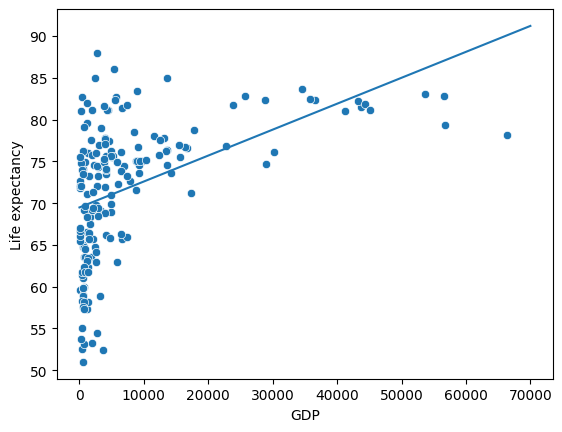

In [31]:
x_fit = np.arange(0, 70000, 1).reshape(-1,1)
#checking a range of 0 to 70000

x_fit_scaled = scale.transform(x_fit)

y_fit = life_linear.predict(x_fit_scaled)


#import matplotlib.pyplot as plt which we have already done
sns.scatterplot(data = life_dfr, x = "GDP", y = "Life expectancy" )

plt.plot(x_fit, y_fit)

Simple Linear Regression on Life expectancy vs Adult Mortality

In [32]:
#Using the above set of code and change the independent variable x to Adult mortality
x = life_dfr["Adult Mortality"]
y = life_dfr["Life expectancy"]


# we need to reshape independent variable x since it is a single data to an array.
#using numpy and rebinding it to x again.
x = x.to_numpy().reshape(-1,1)


# split data (reshaped column) into a train and test set using the 
# "sklearn" lib
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y,
            test_size = 0.2,random_state = 42) #this is 80% trained data and 20% test data


#Standardize the data set to get a zero mean and standard deviation of 1.
# This ensures the data are very close to the mean.
from sklearn.preprocessing import StandardScaler

#create an instance of standardscaler
scale = StandardScaler()

#fit the standardization to the whole data set x
scale.fit(x)


x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)


#import LinearRegression class from the linear_model
from sklearn.linear_model import LinearRegression


#create an instance of the model and fit the training data
life_linear = LinearRegression()
life_linear.fit(x_train_scaled, y_train)


#after fitting put the gradient and intercept

gradient = life_linear.coef_[0]
intercept = life_linear.intercept_




# we have trained the model using the train data, 
# now we evaluate it using the test dataset

# using the predict() function to the LinearRegression model
life_pred = life_linear.predict(x_test_scaled)

#import the metrics from sklearn metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#compute the metrics by suppplying y_test and life_pred
mae = mean_absolute_error(y_test, life_pred)
mse = mean_squared_error(y_test, life_pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_test,life_pred)

print(f"The gradient and intercept are as followed")
print(f"gradient: {gradient:.2f}")
print(f"intercept: {intercept:.2f}")
print (f"y = {gradient:.2f}x + {intercept:.2f}")
print(f"")
print(f"The performace metrics are as followed")
print(f"The result of the mean_absolute_error is: {mae:.2f}")
print(f"The result of the mean_squared_error is: {mse:.2f}")
print(f"The result of the root mean sqaured error is: {rmse:.2f}")
print(f"The Coefficient of determination: {R2:.2f}")

The gradient and intercept are as followed
gradient: -6.35
intercept: 71.75
y = -6.35x + 71.75

The performace metrics are as followed
The result of the mean_absolute_error is: 3.61
The result of the mean_squared_error is: 27.83
The result of the root mean sqaured error is: 5.28
The Coefficient of determination: 0.60


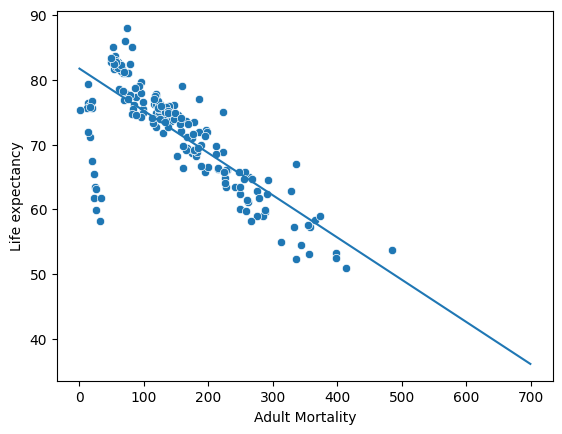

In [33]:
x_fit = np.arange(0,700, 1).reshape(-1,1) 
#checking a range of 0 to 700 to capture the adult mortality inputs

x_fit_scaled = scale.transform(x_fit)

y_fit = life_linear.predict(x_fit_scaled)


#import matplotlib.pyplot as plt which we have already done
sns.scatterplot(data = life_dfr, x = "Adult Mortality", y = "Life expectancy" )

plt.plot(x_fit, y_fit)

In [34]:
#Using the above set of code and change the independent variable x to Adult mortality
x = life_dfr["infant deaths"]
y = life_dfr["Life expectancy"]


# we need to reshape independent variable x since it is a single data to an array.
#using numpy and rebinding it to x again.
x = x.to_numpy().reshape(-1,1)


# split data (reshaped column) into a train and test set using the 
# "sklearn" lib
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y,
            test_size = 0.2,random_state = 42) #this is 80% trained data and 20% test data


#Standardize the data set to get a zero mean and standard deviation of 1.
# This ensures the data are very close to the mean.
from sklearn.preprocessing import StandardScaler

#create an instance of standardscaler
scale = StandardScaler()

#fit the standardization to the whole data set x
scale.fit(x)


x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)


#import LinearRegression class from the linear_model
from sklearn.linear_model import LinearRegression


#create an instance of the model and fit the training data
life_linear = LinearRegression()
life_linear.fit(x_train_scaled, y_train)


#after fitting put the gradient and intercept

gradient = life_linear.coef_[0]
intercept = life_linear.intercept_




# we have trained the model using the train data, 
# now we evaluate it using the test dataset

# using the predict() function to the LinearRegression model
life_pred = life_linear.predict(x_test_scaled)

#import the metrics from sklearn metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#compute the metrics by suppplying y_test and life_pred
mae = mean_absolute_error(y_test, life_pred)
mse = mean_squared_error(y_test, life_pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_test,life_pred)

print(f"The gradient and intercept are as followed")
print(f"gradient: {gradient:.2f}")
print(f"intercept: {intercept:.2f}")
print (f"y = {gradient:.2f}x + {intercept:.2f}")
print(f"")
print(f"The performace metrics are as followed")
print(f"The result of the mean_absolute_error is: {mae:.2f}")
print(f"The result of the mean_squared_error is: {mse:.2f}")
print(f"The result of the root mean sqaured error is: {rmse:.2f}")
print(f"The Coefficient of determination: {R2:.2f}")

The gradient and intercept are as followed
gradient: -1.76
intercept: 71.99
y = -1.76x + 71.99

The performace metrics are as followed
The result of the mean_absolute_error is: 6.80
The result of the mean_squared_error is: 67.94
The result of the root mean sqaured error is: 8.24
The Coefficient of determination: 0.01


Comment: Comparing the simple linear regression of the three correlations, it shows that the correlation on Adult Mortality  provides the best prediction for life expectancy. This is because it has the least mean absolute error of 3.61, the leaset mean squared error of 27.83 andnthe least root mean squared error of 5.28 and the highest coefficient of determination of 0.60. 
This further buttress the above signigficant figure of -0.74 in the seaborns heatmap.

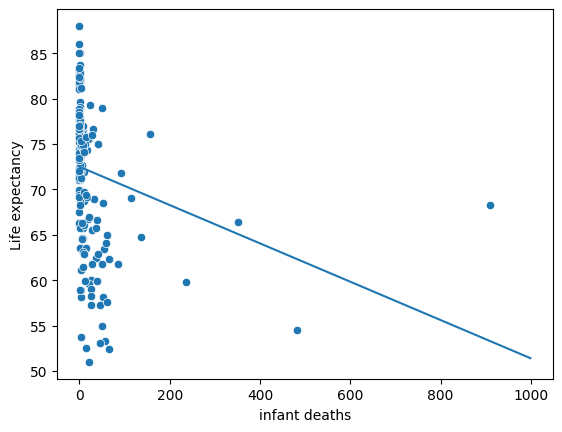

In [35]:
x_fit = np.arange(0, 1000, 1).reshape(-1,1)
#checking a range of 0 to 1000 to capture the infant death inputs

x_fit_scaled = scale.transform(x_fit)

y_fit = life_linear.predict(x_fit_scaled)


#import matplotlib.pyplot as plt which we have already done
sns.scatterplot(data = life_dfr, x = "infant deaths", y = "Life expectancy" )

plt.plot(x_fit, y_fit)

#### b: Polynomial Regression Model; Life expectancy against GDP

In [36]:
# Extract the columns to compare
x = life_dfr ["GDP"]
y = life_dfr ["Life expectancy"]


# Reshape the column (Adult Mortality) to compare on the x axis
x = x.to_numpy().reshape(-1,1)



# split data (reshaped column) into a train and test set using the 
# "sklearn" lib
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y,
            test_size = 0.2,random_state = 42)


# Apply standardization
from sklearn.preprocessing import StandardScaler

#create an instance of the StandardScaler class
scale = StandardScaler()


# fit the scale to the data of x. This allows it to determine the mean
# and standard deviation of the data.
scale.fit(x)


# use the above scale to "transform" the train and test dataset into 
x_train_scaled = scale.transform (x_train)
x_test_scaled = scale.transform (x_test)



#### Degree: 2

In [37]:
#create polynomial features and put the scaled varible into a poly transform
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, include_bias = False)
x_poly_train = poly.fit_transform(x_train_scaled)
x_poly_test = poly.transform(x_test_scaled)


#use inputs into a Linear Regression model, 
#because a polynomial model is just a linear combination of polynomials
life_poly = LinearRegression()
life_poly.fit(x_poly_train, y_train)



#the gradient and intercept
coefficients = life_poly.coef_.round(decimals = 2) #.round(decimals = ?) rounds up to x number of places
intercept = life_poly.intercept_

print(f"The coefficients and intercept are as followed")
print(f"coefficients: {coefficients}")
print(f"intercept: {intercept:.2f}")


The coefficients and intercept are as followed
coefficients: [ 7.75 -1.49]
intercept: 73.17


Polynomial Regression Model Evaluation

In [38]:
# we have trained the model using the train data,
# start by calculating the predicted outputs (life expectancies)
# from the test datset using the model.use the "predict" function.

life_pred = life_poly.predict(x_poly_test)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, life_pred)
mse = mean_squared_error (y_test, life_pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_test, life_pred)


print(f"")
print(f"The performace metrics are as followed")
print(f"The result of the mean_absolute_error is: {mae:.2f}")
print(f"The result of the mean_squared_error is: {mse:.2f}")
print(f"The result of the root mean sqaured error is: {rmse:.2f}")
print(f"The Coefficient of determination: {R2:.2f}")


The performace metrics are as followed
The result of the mean_absolute_error is: 5.51
The result of the mean_squared_error is: 50.90
The result of the root mean sqaured error is: 7.13
The Coefficient of determination: 0.26


#### Degree 3:

In [39]:
#create polynomial features and put the scaled varible into a poly transform
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3, include_bias = False)
x_poly_train = poly.fit_transform(x_train_scaled)
x_poly_test = poly.transform(x_test_scaled)


#use inputs into a Linear Regression model, 
#because a polynomial model is just a linear combination of polynomials
life_poly = LinearRegression()
life_poly.fit(x_poly_train, y_train)



#the gradient and intercept
coefficients = life_poly.coef_[0].round(decimals = 2) #.round(decimals = ?) rounds up to x number of places
intercept = life_poly.intercept_

print(f"The coefficients and intercept are as followed")
# print(f"coefficients: {coefficients:.2f}"), This gave a Type Error
print(f"coefficients: {coefficients}")
print(f"intercept: {intercept:.2f}")
#print (f"y = {gradient:.2f}x + {intercept:.2f}")

The coefficients and intercept are as followed
coefficients: 9.07
intercept: 74.07


Polynomial Regression Model Evaluation; Degree of 3

In [40]:
# we have trained the model using the train data,
# start by calculating the predicted outputs (life expectancies)
# from the test datset using the model.use the "predict" function.

life_pred = life_poly.predict(x_poly_test)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, life_pred)
mse = mean_squared_error (y_test, life_pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_test, life_pred)


print(f"")
print(f"The performace metrics are as followed")
print(f"The result of the mean_absolute_error is: {mae:.2f}")
print(f"The result of the mean_squared_error is: {mse:.2f}")
print(f"The result of the root mean sqaured error is: {rmse:.2f}")
print(f"The Coefficient of determination: {R2:.2f}")


The performace metrics are as followed
The result of the mean_absolute_error is: 5.46
The result of the mean_squared_error is: 49.01
The result of the root mean sqaured error is: 7.00
The Coefficient of determination: 0.29


#### Degree: 4

In [41]:
#create polynomial features and put the scaled varible into a poly transform
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4, include_bias = False)
x_poly_train = poly.fit_transform(x_train_scaled)
x_poly_test = poly.transform(x_test_scaled)


#use inputs into a Linear Regression model, 
#because a polynomial model is just a linear combination of polynomials
life_poly = LinearRegression()
life_poly.fit(x_poly_train, y_train)



#the gradient and intercept
coefficients = life_poly.coef_[0].round(decimals = 2) #.round(decimals = ?) rounds up to x number of places
intercept = life_poly.intercept_


################################################################
# we have trained the model using the train data,
# start by calculating the predicted outputs (life expectancies)
# from the test datset using the model.use the "predict" function.
life_pred = life_poly.predict(x_poly_test)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, life_pred)
mse = mean_squared_error (y_test, life_pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_test, life_pred)


print(f"The coefficients and intercept are as followed")
print(f"coefficients: {coefficients}")
print(f"intercept: {intercept:.2f}")
print(f"")
print(f"The performace metrics are as followed")
print(f"The result of the mean_absolute_error is: {mae:.2f}")
print(f"The result of the mean_squared_error is: {mse:.2f}")
print(f"The result of the root mean sqaured error is: {rmse:.2f}")
print(f"The Coefficient of determination: {R2:.2f}")

The coefficients and intercept are as followed
coefficients: 8.42
intercept: 75.03

The performace metrics are as followed
The result of the mean_absolute_error is: 5.46
The result of the mean_squared_error is: 47.96
The result of the root mean sqaured error is: 6.93
The Coefficient of determination: 0.30


#### Degree 5:

In [42]:
#create polynomial features and put the scaled varible into a poly transform
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 5, include_bias = False)
x_poly_train = poly.fit_transform(x_train_scaled)
x_poly_test = poly.transform(x_test_scaled)


#use inputs into a Linear Regression model, 
#because a polynomial model is just a linear combination of polynomials
life_poly = LinearRegression()
life_poly.fit(x_poly_train, y_train)



#the gradient and intercept
coefficients = life_poly.coef_[0].round(decimals = 2) #.round(decimals = ?) rounds up to x number of places
intercept = life_poly.intercept_


################################################################
# we have trained the model using the train data,
# start by calculating the predicted outputs (life expectancies)
# from the test datset using the model.use the "predict" function.
life_pred = life_poly.predict(x_poly_test)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, life_pred)
mse = mean_squared_error (y_test, life_pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_test, life_pred)


print(f"The coefficients and intercept are as followed")
print(f"coefficients: {coefficients}")
print(f"intercept: {intercept:.2f}")
print(f"")
print(f"The performace metrics are as followed")
print(f"The result of the mean_absolute_error is: {mae:.2f}")
print(f"The result of the mean_squared_error is: {mse:.2f}")
print(f"The result of the root mean sqaured error is: {rmse:.2f}")
print(f"The Coefficient of determination: {R2:.2f}")

The coefficients and intercept are as followed
coefficients: 6.94
intercept: 75.27

The performace metrics are as followed
The result of the mean_absolute_error is: 5.30
The result of the mean_squared_error is: 46.50
The result of the root mean sqaured error is: 6.82
The Coefficient of determination: 0.32


Comment: In the model evaluation indicated by the performance metrics of the polynomoial degrees from 2 to 5, it is observed that the mean absolute error,the mean squared error and the root mean squared error decrease as the the polynomial degree increases and the their coefficient of determination increase as the polynomial degree increase. Hence the polynomial degree of 5 gives the best fit to this data

### c.

In [43]:
#Using the above set of code and change the independent variable x to Adult mortality
feature_names = ["GDP","Adult Mortality", "infant deaths"]
x = life_dfr [feature_names]
y = life_dfr ["Life expectancy"]


#There are multiple inputs so we do not need to reshape (-1,1) on x
#it is already a matrix of rows and columns

# split data (reshaped column) into a train and test set using the 
# "sklearn" lib
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y,
            test_size = 0.2,random_state = 42) #this is 80% trained data and 20% test data


#Standardize the data set to get a zero mean and standard deviation of 1.
# This ensures the data are very close to the mean.
from sklearn.preprocessing import StandardScaler

#create an instance of standardscaler
scale = StandardScaler()

#fit the standardization to the whole data set x
scale.fit(x)


x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)


#import LinearRegression class from the linear_model
from sklearn.linear_model import LinearRegression


#create an instance of the model and fit the training data
life_linear = LinearRegression()
life_linear.fit(x_train_scaled, y_train)


#after fitting put the gradient and intercept

gradient = life_linear.coef_[0]
intercept = life_linear.intercept_




# we have trained the model using the train data, 
# now we evaluate it using the test dataset

# using the predict() function to the LinearRegression model
life_pred = life_linear.predict(x_test_scaled)

#import the metrics from sklearn metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#compute the metrics by suppplying y_test and life_pred
mae = mean_absolute_error(y_test, life_pred)
mse = mean_squared_error(y_test, life_pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_test,life_pred)

print(f"The gradient and intercept are as followed")
print(f"gradient: {gradient:.2f}")
print(f"intercept: {intercept:.2f}")
print (f"y = {gradient:.2f}x + {intercept:.2f}")
print(f"")
print(f"The performace metrics are as followed")
print(f"The result of the mean_absolute_error is: {mae:.2f}")
print(f"The result of the mean_squared_error is: {mse:.2f}")
print(f"The result of the root mean sqaured error is: {rmse:.2f}")
print(f"The Coefficient of determination: {R2:.2f}")

The gradient and intercept are as followed
gradient: 1.74
intercept: 71.68
y = 1.74x + 71.68

The performace metrics are as followed
The result of the mean_absolute_error is: 3.57
The result of the mean_squared_error is: 26.21
The result of the root mean sqaured error is: 5.12
The Coefficient of determination: 0.62


Using the K-Nearest Neighbour Model to top predict life expectancy from multiple input features above.

Start by plotting the the data distribution of the different class label

<Axes: xlabel='Life expectancy class', ylabel='count'>

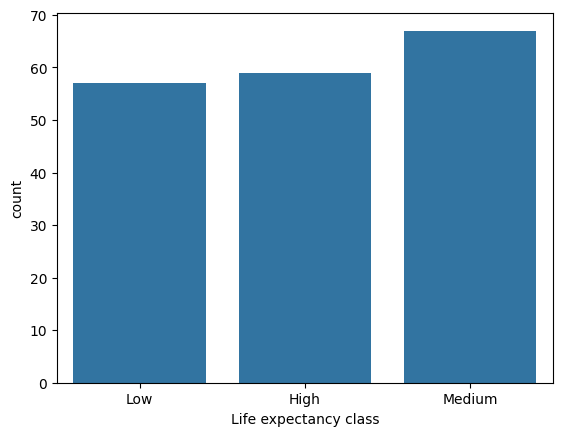

In [44]:
# use Seaborn's "countplot()" fucntion to plot distribution of different class
sns.countplot(data = life_dfr, x = "Life expectancy class")

Comment: The distribution indicates that the Medium data is an outlier and not making the dataset properly fit for evaluatiom.
Hence we resample all the dataset to obtain an even distribution

#### Use Synthetic Minority Oversampling Technique(SMOTE) to resample your dataset so that it contains a balanced number of distribution Low, Medium, and High expectancy countries

<Axes: xlabel='Life expectancy class', ylabel='count'>

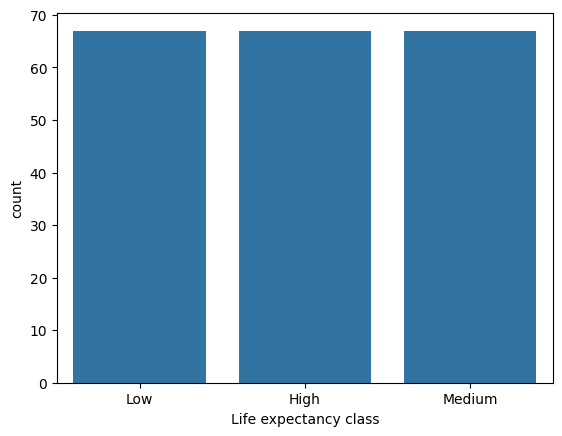

In [45]:
#Extract the input features

feature_names = ["GDP", "Adult Mortality", "infant deaths"]
x = life_dfr[feature_names]
y = life_dfr["Life expectancy class"]


#use SMOTE funtion from the "imblearn" library to resample

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42, k_neighbors = 2)
x_res, y_res = sm.fit_resample(x,y) #resample the the x and y datasets

#pass into a dataframe to plot and check for even distribution
y_res_dfr = pd.DataFrame(y_res)

sns.countplot(data = y_res_dfr, x = "Life expectancy class")

In [46]:
# split data (resampled column) into a train and test set using the "sklearn" lib
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x_res, y_res,
            test_size = 0.2,random_state = 42)

In [47]:
#Apply Standardization because it is a multiple input feature
#import StandardScaler
from sklearn.preprocessing import StandardScaler

#Create an instance of the class StandardScaler
scale = StandardScaler()

#fit reshaped x-res inputs
scale.fit(x_res)

#transform the scaled train and test values
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

In [48]:
# use KNeighborsClassifier model from sklearn 
from sklearn.neighbors import KNeighborsClassifier

#after importing create an instance of the class
life_class = KNeighborsClassifier()
life_class.fit(x_train_scaled, y_train)

KNeighborsClassifier()

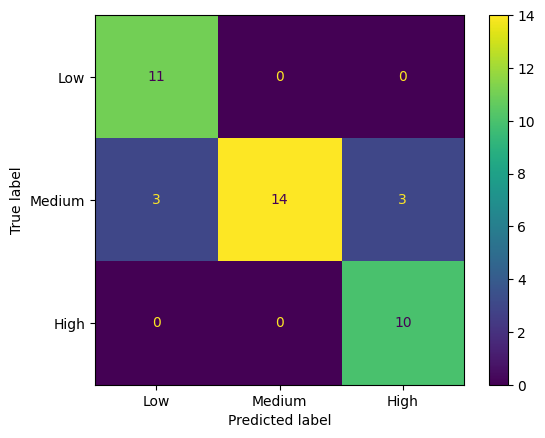

In [49]:
life_pred = life_class.predict(x_test_scaled)

# plot confusion matrix
#import confusion matrix from sklearn
from sklearn.metrics import confusion_matrix 
conf_matrix = confusion_matrix(y_test, life_pred, labels = ["Low", "Medium", "High"]) 


from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(conf_matrix, display_labels = ["Low", "Medium", "High"]) 

disp.plot()

In [50]:

from sklearn.metrics import classification_report
print(classification_report(y_test, life_pred))

              precision    recall  f1-score   support

        High       0.77      1.00      0.87        10
         Low       0.79      1.00      0.88        11
      Medium       1.00      0.70      0.82        20

    accuracy                           0.85        41
   macro avg       0.85      0.90      0.86        41
weighted avg       0.89      0.85      0.85        41



#### d:

Comment: Comparing the regression model  with multiple input features(GDP, Adult Mortality,infant deaths) and the plausible best single input feature (Adult Mortality) for the best prediction for life expectancy, the performance metrices show slight evaluated differences.
The multiple feature's input gave a mean absolute error of 3.57 which is lesser than the single features 3.61.
The multiple feature's input gave a mean squared error of 26.21 which is lesser than the single feature 27.83
The multiple feature's input gave a root mean squared error  of 5.12 which is lesser than the single feature 5.28
The multiple feature's input gave a slightly higher coefficient of determination of 0.62 than the single feature 0.60.

Hence the multiple feature input is the best model to use to predict the life expectancy in a country.
    

## PART II: Unsupervised Learning Models to Identify Clustering Patterns

#### a:

In [51]:
#First, import all necessary libraries needed.
import csv
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn

#### Using K-Means Clustering Algorithm

Apply K-Means to clustering algorithm to Life expectancy versus GDP

In [52]:
#import csv file using pandas
life_dfr = pd.read_csv("life_expectancy_data.csv")

In [53]:
life_dfr

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,GDP,Life expectancy class
0,Afghanistan,2015,Developing,65.0,263.0,62,584.259210,Low
1,Albania,2015,Developing,77.8,74.0,0,3954.227830,High
2,Algeria,2015,Developing,75.6,19.0,21,4132.762920,Medium
3,Angola,2015,Developing,52.4,335.0,66,3695.793748,Low
4,Antigua and Barbuda,2015,Developing,76.4,13.0,0,13566.954100,High
...,...,...,...,...,...,...,...,...
178,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,4110.000000,Medium
179,Viet Nam,2015,Developing,76.0,127.0,28,2600.000000,High
180,Yemen,2015,Developing,65.7,224.0,37,1490.000000,Low
181,Zambia,2015,Developing,61.8,33.0,27,1313.889646,Low


#### K-Mean Cluster Algorithm based on Life expectancy vs GDP

In [54]:
#First create a feature column of bothe Life expectancy and GDP
feature_names = ["GDP", "Life expectancy"]
x = life_dfr[feature_names]

Apply Standardization: i.e Mean = 0 and S.D = 1 so data set will be close to the origin

In [55]:
#using the StandardScaler class from preprocessing
from sklearn.preprocessing import StandardScaler

#create an instance of it
scale = StandardScaler()

#fit the StandardScaler to x
scale.fit(x)
x_scaled = scale.transform(x)

Determine the optimal number of clusters k from a range of 1 - 10

In [56]:
#import KMeans from sklearn library cluster
from sklearn.cluster import KMeans

In [57]:
#create an initail list to be populated by k values.
inertia_list = []

#list comprehension to create k values
k_range = [i for i in range(1,11)]


In [58]:
k_range

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [59]:
k_range

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [60]:
for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(x_scaled)
    inertia = kmeans.inertia_
    inertia_list.append(inertia)

C:\Users\mayow\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mayow\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mayow\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mayow\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [61]:
inertia_list

[366.0,
 196.1054913288861,
 80.83331524270233,
 60.786794614304526,
 45.821624502029366,
 33.60915490435178,
 26.06964614066002,
 22.02187012343695,
 17.986102655454538,
 15.268049323668627]

Elbow Method: Create a plot of inertia in inertia_list versus k in k_range

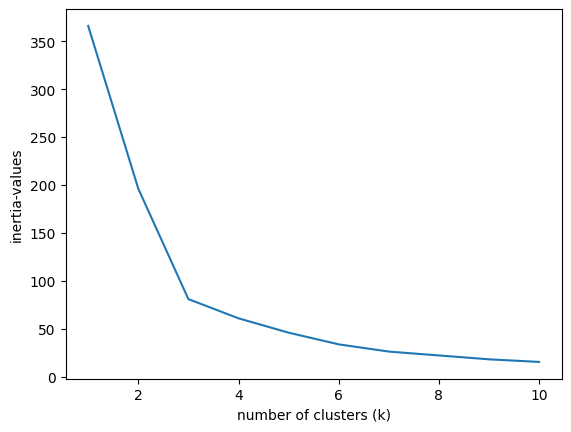

In [62]:
plt.plot(k_range,inertia_list)

plt.xlabel("number of clusters (k)")
plt.ylabel("inertia-values")
plt.show()

Comment: The optimal value for k is at 3 where the plot starts to flatten out.

Fit the optimal value of k back into the K-means modelto predict the cluster labels of each data point in the dataset

In [63]:
# bind optimal value of k=  3 to n_clusters
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(x_scaled)

#predict the labels for the given scaled x dataset
cluster_labels_pred = kmeans.predict(x_scaled)

C:\Users\mayow\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [64]:
cluster_labels_pred

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 0, 0, 2,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 2, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 2, 1,
       0, 1, 1, 1, 0, 0, 0])

### Model Evaluation

We have trained our model to cluster, and it is time to evaluate the clustering, since our dataset does not contain "ground truth" labels for what the clusters should be, we cannot use external evaluation measures. Hence we will use Internal evaluation model

Introducing the internal Evaluation meausures of Davies-Bouldin index, Calinski - Harabasz index and, Silhouette Coefficient

In [65]:
#import the internal evaluation measures from sklearn library metrics
from sklearn.metrics import davies_bouldin_score,silhouette_score, calinski_harabasz_score
 
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
s_score = silhouette_score(x_scaled, cluster_labels_pred)
c_score = calinski_harabasz_score (x_scaled, cluster_labels_pred)

print(f"The Davies_Bouldin_score is: {db_score:.2f}")
print(f"The Calinski_Harabasz_score is: {c_score:.2f}")
print(f"The Silhouette_Coefficient is: {s_score:.2f}")

The Davies_Bouldin_score is: 0.58
The Calinski_Harabasz_score is: 317.51
The Silhouette_Coefficient is: 0.55


Plot showing the cluster results, using the cluster_labels_pred as hue

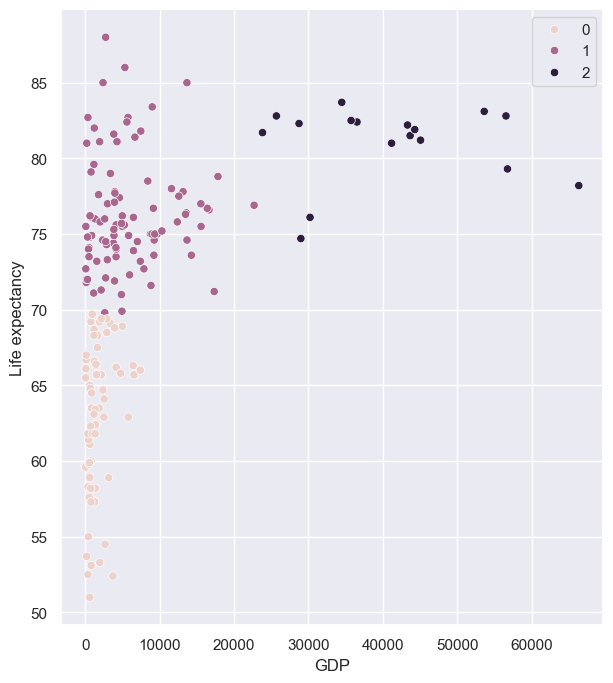

In [66]:
plt.figure (figsize = (7,8), dpi = 100)
sns.set (font_scale = 1)
sns.scatterplot(data = life_dfr , x = life_dfr["GDP"], y = life_dfr["Life expectancy"], hue = cluster_labels_pred)
plt.show()

#### K-Mean Cluster Algorithm based on Life expectancy vs Adult Mortality

In [67]:
#First create a feature column of bothe Life expectancy and Adult Mortality
feature_names = ["Adult Mortality", "Life expectancy"]
x = life_dfr[feature_names]

In [68]:
#using the StandardScaler class from preprocessing
from sklearn.preprocessing import StandardScaler

#create an instance of it
scale = StandardScaler()

#fit the StandardScaler to x
scale.fit(x)
x_scaled = scale.transform(x)

In [69]:
#import KMeans from sklearn library cluster
#from sklearn.cluster import KMeans

In [70]:
#create an initail list to be populated by k values.
inertia_list = []

#list comprehension to create k values
k_range = [i for i in range(1,11)]

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(x_scaled)
    inertia = kmeans.inertia_
    inertia_list.append(inertia)
    
print(k_range)
print(inertia_list)

C:\Users\mayow\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mayow\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mayow\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mayow\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[366.0000000000001, 138.10508181523224, 87.99595272518025, 63.56611359382557, 40.682429358796625, 28.993376219150377, 22.745809707871732, 19.05140854185357, 16.22879730263521, 14.17650517240751]


C:\Users\mayow\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mayow\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


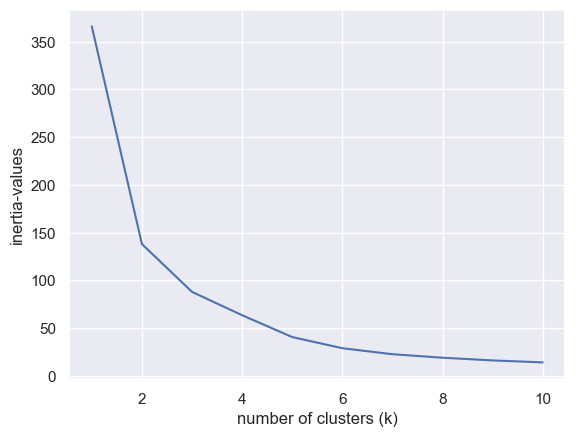

In [71]:
#Plot to see the optimal value of k
plt.plot(k_range, inertia_list)

plt.xlabel("number of clusters (k)")
plt.ylabel("inertia-values")
plt.show()

Comment: The optimal value for k is at 3 where the plot starts to flatten out.Hence rebind 3 to the n_clusters

In [72]:
# bind optimal value of k=  3 to n_clusters
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(x_scaled)

#predict the labels for the given scaled x dataset
cluster_labels_pred = kmeans.predict(x_scaled)

C:\Users\mayow\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [73]:
cluster_labels_pred

array([0, 1, 1, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 1, 0,
       2, 1, 2, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1,
       2, 0, 1, 0, 2, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 2, 0, 2, 1, 0, 1, 2,
       2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0, 2, 1,
       2, 2, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 1,
       0, 2, 0, 2, 1, 1, 2, 2, 0, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 1, 2, 0,
       2, 0, 1, 1, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 2, 0, 2, 1, 1, 0, 1, 1,
       2, 1, 2, 1, 2, 2, 0])

#### Model Evaluation

In [74]:
#import the internal evaluation measures from sklearn library metrics
from sklearn.metrics import davies_bouldin_score,silhouette_score, calinski_harabasz_score
 
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
s_score = silhouette_score(x_scaled, cluster_labels_pred)
c_score = calinski_harabasz_score (x_scaled, cluster_labels_pred)

print(f"The Davies_Bouldin_score is: {db_score:.2f}")
print(f"The Calinski_Harabasz_score is: {c_score:.2f}")
print(f"The Silhouette_Coefficient is: {s_score:.2f}")

The Davies_Bouldin_score is: 0.79
The Calinski_Harabasz_score is: 284.34
The Silhouette_Coefficient is: 0.44


Comment: The performance metrics of the clustering model as shown above indicates that the Davies_Bouldin_score for life expectancy vs GDP is lesser i.e 0.576 than that of life expectancy vs Adult mortality, hence the former has a better clustering.
Furthermore, the Silhouette coefficient of the life expectancy vs GDP is closer to +1 i.e 0.546 than the of life expectancy vs Adult mortality, hence indicating life expectancy is more compact.
Moreover, the Calinski_Harabasz score of the life expectancy vs GDP is higher i.e 317.505 which is indicating the cluster is farther away from other clusters and well defined, compared to the the lesser value of Calinski_Harabasz for life expectancy vs Adult Mortality.

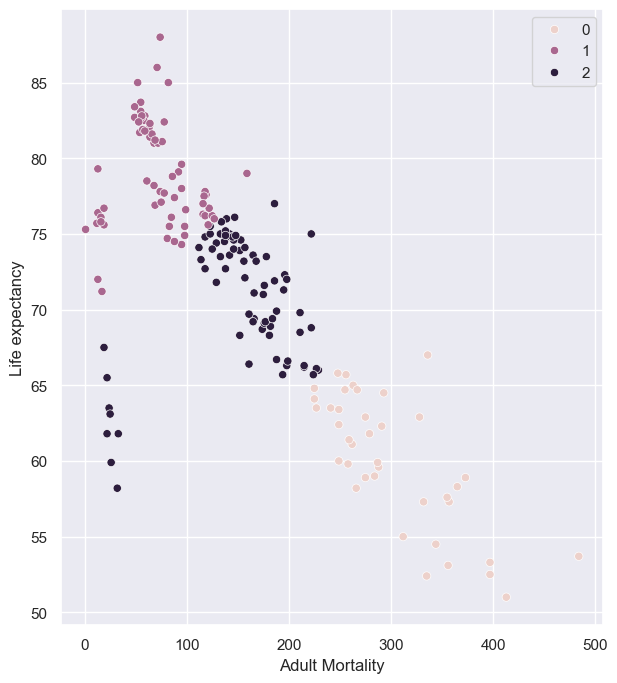

In [75]:
plt.figure (figsize = (7,8), dpi = 100)
sns.set (font_scale = 1)
sns.scatterplot(data = life_dfr , x = life_dfr["Adult Mortality"], y = life_dfr["Life expectancy"], hue = cluster_labels_pred)
plt.show()

#### b:

Using Life Expectancy vs GDP compare the clustering of countries prediced by K-Means Clustering, Agglomerative Hierarchical Clustering and DBSCAN Model.

Agglomerative Hierarchical Clustering:

In [76]:
#DATASET FEATURE IMPORTATION
# Extract input features of Life expectancy and GDP
feature_names = ["GDP", "Life expectancy"]
x = life_dfr[feature_names]

#DATASET STANDARDIZATION
#We need to apply standardisation to rescale the input features such that they each have
# MEAN = 0 and S.D = 1
from sklearn.preprocessing import StandardScaler

#create an instance of it
scale = StandardScaler()

#fit the StandardScaler to x
scale.fit(x)
x_scaled = scale.transform(x)


#TRAINING OF DATASET WITH CLUSTERING MODEL
#import AgglomerativeClustering model from sklearn library
from sklearn.cluster import AgglomerativeClustering

#create an instance of the class AgglomerativeClustering model
agg_model = AgglomerativeClustering (n_clusters = 3, linkage = 'complete')

#fit to the scaled data and predict the output of the cluster data
agg_labels_pred = agg_model.fit_predict(x_scaled)


#MODEL EVALUATION
#import the internal evaluation measures from sklearn library metrics
from sklearn.metrics import davies_bouldin_score,silhouette_score, calinski_harabasz_score
 
db_score = davies_bouldin_score(x_scaled, agg_labels_pred)
s_score = silhouette_score(x_scaled, agg_labels_pred)
c_score = calinski_harabasz_score (x_scaled, agg_labels_pred)

print(f"The Davies_Bouldin_score is: {db_score:.2f}")
print(f"The Calinski_Harabasz_score is: {c_score:.2f}")
print(f"The Silhouette_Coefficient is: {s_score:.2f}")

The Davies_Bouldin_score is: 0.56
The Calinski_Harabasz_score is: 129.50
The Silhouette_Coefficient is: 0.44


scatterplot

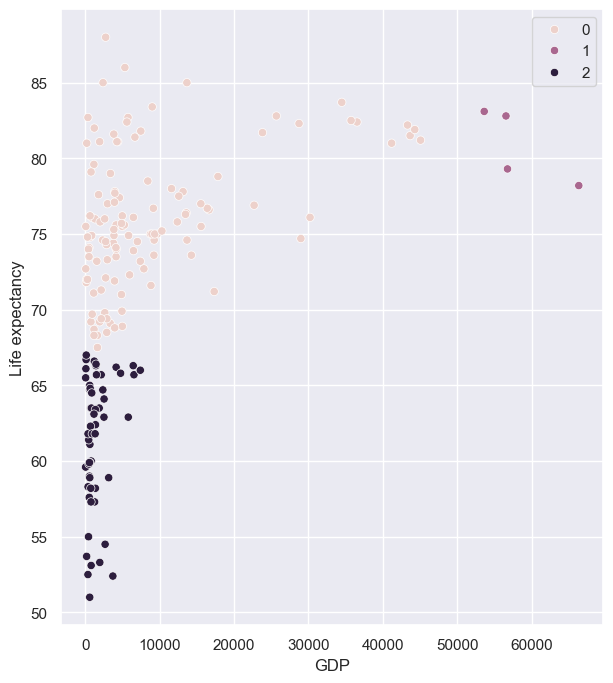

In [77]:
plt.figure (figsize = (7,8), dpi = 100)
sns.set (font_scale=1)
sns.scatterplot(data = life_dfr , x = life_dfr["GDP"], y = life_dfr["Life expectancy"], hue = agg_labels_pred)
plt.show()

DBSCAN Clustering Medel:

In [78]:
#DATASET FEATURE IMPORTATION
# Extract input features of Life expectancy and GDP
feature_names = ["GDP", "Life expectancy"]
x = life_dfr[feature_names]

#DATASET STANDARDIZATION
#We need to apply standardisation to rescale the input features such that they each have
# MEAN = 0 and S.D = 1
from sklearn.preprocessing import StandardScaler

#create an instance of it
scale = StandardScaler()

#fit the StandardScaler to x
scale.fit(x)
x_scaled = scale.transform(x)

#TRAINING OF DATASET WITH CLUSTERING MODEL
#import the DBSCAN
from sklearn.cluster import DBSCAN

#initialize the instance of DBSCAN
#assign epsilon value of 2 and minimum sample of 3
dbscan = DBSCAN(eps = 0.2, min_samples = 3)

#Fit the scaled data set of x to the model and predict the cluster labels of the data
dbscan_labels_pred = dbscan.fit_predict(x_scaled)

#MODEL EVALUATION
#import the internal evaluation measures from sklearn library metrics
from sklearn.metrics import davies_bouldin_score,silhouette_score, calinski_harabasz_score
 
db_score = davies_bouldin_score(x_scaled, dbscan_labels_pred)
s_score = silhouette_score(x_scaled, dbscan_labels_pred)
c_score = calinski_harabasz_score (x_scaled, dbscan_labels_pred)

print(f"The Davies_Bouldin_score is: {db_score:.2f}")
print(f"The Calinski_Harabasz_score is: {c_score:.2f}")
print(f"The Silhouette_Coefficient is: {s_score:.2f}")

The Davies_Bouldin_score is: 1.15
The Calinski_Harabasz_score is: 47.83
The Silhouette_Coefficient is: 0.30


Scatterplot

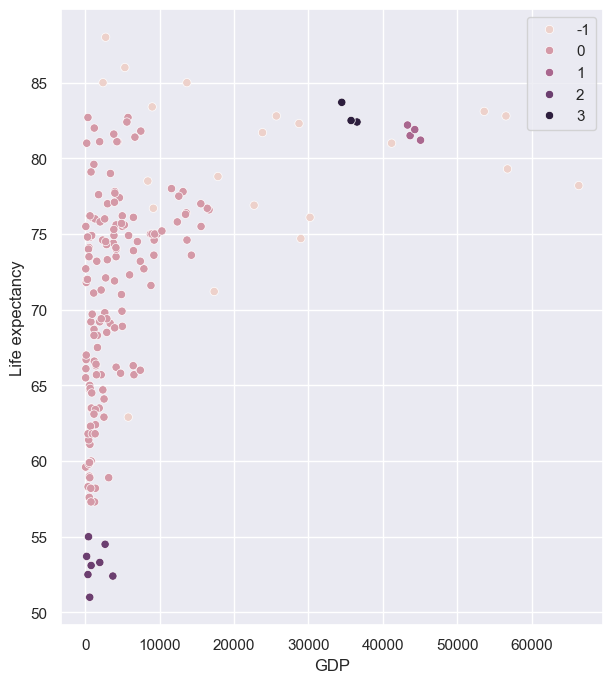

In [79]:
plt.figure (figsize = (7,8), dpi = 100)
sns.set (font_scale=1)
sns.scatterplot(data = life_dfr , x = life_dfr["GDP"], y = life_dfr["Life expectancy"], hue = dbscan_labels_pred)
plt.show()

Conclusion: After the above model clustering evaluations, the mdel that produces the best clustering for this data of life expectancy is K-Mean Clustering model. This is because it has less value for Davies Bouldin Score and its Silhouette coefficient is closer to +1 than the other two i.e Agglomerative clustering model and DBSCAN clustering model. 
Furthermore, the scatterplot for the KMean clustering model shows a better compactness of datapoint and that they are generally assigned to the same cluster.